# Projeto 3 - Detecção de Sinais DTMF

Neste projeto será mostrado como o sistema de teclas em um telefone usa sinais de
diferentes frequências para indicar qual tecla foi pressionada. A Transformada de Fourier
de Tempo Discreto (TFTD) de um sinal de telefone amostrado pode ser usada para
identificar essas frequências. O som que você escuta quando uma tecla é pressionada é a
soma de duas senóides. A senóide de frequência mais alta indica a coluna e a de frequência
mais baixa indica a linha do teclado. A figura 1 a seguir mostra um teclado juntamente com
as duas frequências correspondentes a cada dígito, considerando que a forma de onda
contínua é amostrada a $8192 kHz$. A figura mostra ainda uma tabela contendo as
frequências de cada dígito. Assim, por exemplo, o dígito 5 é representado pelo sinal

$d5 = sen(0,5906n) + sen(1,0247n)$

\begin{table}[]
\begin{tabular}{llll}
               & \multicolumn{3}{l}{Freq. (colunas)} \\
Freq. (linhas) & 0,9273     & 1,0247     & 1,1328    \\
0,5346         & 1          & 2          & 3         \\
0,5906         & 4          & 5          & 6         \\
0,6535         & 7          & 8          & 9         \\
0,7217         &            & 0          &          
\end{tabular}
\end{table}

## Parte 1: Problemas Básicos

Nesses problemas você criará o tom apropriado para cada dígito e examinará a TFTD
para verificar se os sinais tem as frequências corretas. Você também definirá um vetor
contendo os tons de seu número de telefone.


a) Crie vetores linha d0 a d9 para representar todos os 10 dígitos no intervalo 0 ≤ n ≤ 999.
Escute cada sinal usando sound. Por exemplo, sound (d2, 8192) deve soar como o tom que
você ouve quando pressiona o “2” no teclado.

In [1]:
n = linspace(0, 2047, 2048); % criado com o dobro do tamanho para ouvir melhor

rows = [0.5346, 0.5906, 0.6535, 0.7217];
columns = [0.9274, 1.0247, 1.1328];

d0 = sin(0.7217*n) + sin(1.0247*n);
d1 = sin(0.5346*n) + sin(0.9273*n);
d2 = sin(0.5346*n) + sin(1.0247*n);
d3 = sin(0.5346*n) + sin(1.1328*n);
d4 = sin(0.5906*n) + sin(0.9273*n);
d5 = sin(0.5906*n) + sin(1.0247*n);
d6 = sin(0.5906*n) + sin(1.1328*n);
d7 = sin(0.6535*n) + sin(0.9273*n);
d8 = sin(0.6535*n) + sin(1.0247*n);
d9 = sin(0.6535*n) + sin(1.1328*n);

sound(d0, 8192)
sound(d1, 8192)
sound(d2, 8192)
sound(d3, 8192)
sound(d4, 8192)
sound(d5, 8192)
sound(d6, 8192)
sound(d7, 8192)
sound(d8, 8192)
sound(d9, 8192)

d0 = d0(1:1000);
d1 = d1(1:1000);
d2 = d2(1:1000);
d3 = d3(1:1000);
d4 = d4(1:1000);
d5 = d5(1:1000);
d6 = d6(1:1000);
d7 = d7(1:1000);
d8 = d8(1:1000);
d9 = d9(1:1000);

ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock


b) A função fft pode ser usada para computar N amostras da TFTD de um sinal de
comprimento finito, nas frequências $\omega_k = \frac{2 k \pi}{Ν}$. Por exemplo, fft (x, 2048) computa 2048 amostras igualmente espaçadas de $X(e^{j\omega})$ em $\omega_k = \frac{2k\pi}{2048}$, para $0 \leq k \leq 2047$. Use fft para computar amostras de $D2(e^{j\omega})$ e $D9(e^{j\omega})$ em $\omega_k = \frac{2k\pi}{2048}$. Defina omega como sendo um vetor contendo $\omega_k$ para $0 \leq k \leq 2047$. Esboce as amplitudes da TFTD para esses sinais em gráficos rotulados e confirme que os picos ocorrem para as frequências dadas na figura
1.


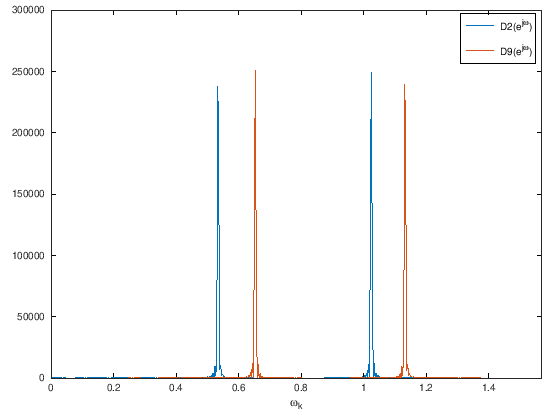

In [2]:
w_k = 2*n*pi/2048;
D2 = fft(d2, 2048);
D9 = fft(d9, 2048);

plot(w_k, D2.*conj(D2), w_k, D9.*conj(D9))
xlim([0 pi/2])
xlabel('\omega_k')
legend('D2(e^{j\omega})', 'D9(e^{j\omega})')

c) Defina espaço como sendo um vetor com 100 amostras de “silêncio” usando zeros.
Defina seu número de telefone como fone através dos sinais apropriados e espaço. Por
exemplo, se seu número é 32718210, você vai digitar

> fone = [d3 espaço d2 espaço d7 espaço d1 espaço d8 espaço d2 espaço d1 espaço d0];

Observe que os dígitos definidos na parte (a) e espaço devem ser vetores linha. “Toque”
seu número usando sound e verifique que ele soa do mesmo modo que quando você o
digita no teclado.


In [57]:
space = zeros(1,100);
fone = [d9 space d8 space d7 space d1 space d4 space d7 space d2];
sound(fone, 8192);

## Parte 2: Problemas Intermediários

Nesta parte você aprenderá a decodificar números de telefone. Os números a ser
decodificados estão em um arquivo chamado touch.mat. Os dados podem ser carregados
no MATLAB digitando load touch. Se o arquivo for carregado corretamente você deve ser
capaz de listar os nomes das variáveis digitando

> who

As variáveis são
> hardx1 hardx2 x1 x2

Os vetores x1 e x2 contém versões amostradas das sequências representando dois diferentes
números (as sequências são como na parte (c)). Os vetores hardx1 e hardx2 são versões
discadas menos precisas dos mesmos números.

In [9]:
load touch.m

d) Usando fft compute 2048 amostras igualmente espaçadas da TFTD de cada dígito de x1.
Para aplicar fft a cada dígito separadamente será preciso segmentar o sinal em sete dígitos
usando a informação sobre os comprimentos relativos dos dígitos e espaços, ou então
esboçando o sinal e identificando onde cada dígito começa e termina. Para determinar os
dígitos do número de telefone representado por x1, esboce a amplitude da TFTD e compare
as frequências de pico do sinal com aquelas da figura 1 (na sua resposta a soma dos dígitos
do número encontrado deve ser 41).

In [80]:
for n = 0:6
    start = 1100*n+1;
    d = x1(start:start+999);
    
    D = fft(d, 2048);
    D = D(1:1024);        % get only interval from 0 to pi
    
    [val, i] = max(D);
    w1 = w_k(i)
    D(i) = 0;
    [val, i] = max(D);
    w2 = w_k(i)
    printf('\n')
end

w1 =  0.92652
w2 =  0.58905

w1 =  0.65348
w2 =  1.1321

w1 =  0.92652
w2 =  0.53383

w1 =  1.0247
w2 =  0.58905

w1 =  0.65348
w2 =  1.0247

w1 =  0.65348
w2 =  0.92652

w1 =  0.65348
w2 =  0.92652



e) Repita a parte (d) para o sinal x2 e decodifique os dígitos desse número também (nesse
caso a soma dos dígitos não é 41).

In [81]:
for n = 0:6
    start = 1100*n+1;
    d = x2(start:start+999);
    
    D = fft(d, 2048);
    D = D(1:1024);        % get only interval from 0 to pi
    
    [val, i] = max(D);
    w1 = w_k(i)
    D(i) = 0;
    [val, i] = max(D);
    w2 = w_k(i)
    printf('\n')
end

w1 =  1.0247
w2 =  0.53383

w1 =  1.0247
w2 =  0.58905

w1 =  0.53383
w2 =  1.1321

w1 =  0.92652
w2 =  0.53383

w1 =  1.0247
w2 =  0.72097

w1 =  1.0247
w2 =  0.72097

w1 =  1.0247
w2 =  0.72097



## Parte 3: Problemas Avançados

Nesta parte você escreverá uma função para decodificar números de telefone,
automaticamente, a partir dos tons gerados por um teclado. Para projetar o decodificador
você observará as energias dos tons em cada uma das possíveis frequências indicadas na
figura 1.


f) Usando fft para computar 2048 amostras de $X(e^{j\omega})$, encontre que valor de $\omega_k$, e do
índice k correspondente, é mais próximo de cada uma das frequências dos tons. Lembre que
os vetores no MATLAB iniciam com o índice k=1, de modo que a amostra da DTFT em
$\omega = 0$ é armazenada em $X(1)$.

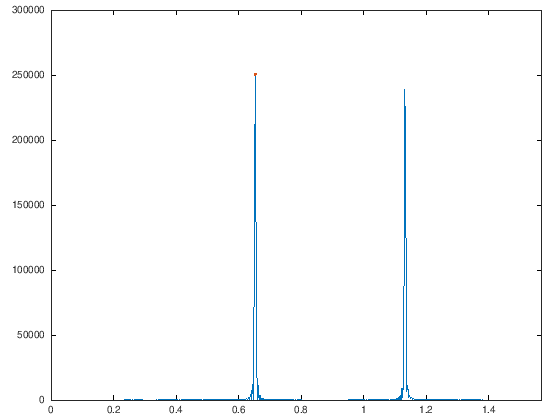

In [10]:
x = fone(1:1000);
X = fft(x, 2048);
energy = X.*conj(X);
plot(w_k, energy, w_k(214), energy(214));
xlim([0 pi/2])

In [11]:
function adjusted_freqs = get_approx_freqs(rows, columns, freqs)
    values = [rows columns];
    adjusted_freqs = [];

    for v = values
        [m,i] = min(abs(freqs - v));
        adjusted_freqs = [adjusted_freqs freqs(i)];
    end
end

In [27]:
w = [rows columns]
adjusted_w = get_approx_freqs(rows, columns, w_k)

w =

   0.53460   0.59060   0.65350   0.72170   0.92740   1.02470   1.13280

adjusted_w =

   0.53383   0.59212   0.65348   0.72097   0.92652   1.02470   1.13208



g) O valor de $|X(e^{j\omega k})|^2$ dá a energia em um sinal, na frequência $\omega_k$ . Calcule a DFT de d8 (definido na parte (a)), e use a saída da fft para computar $|D8(e^{j\omega k})|^2$ para cada um dos $\omega_k$ determinado na parte (f). A energia é a maior para os valores de $\omega_k$ correspondentes a um “8”?

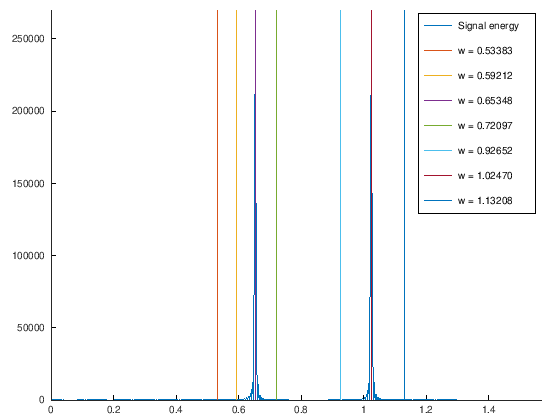

In [54]:
D8 = fft(d8, 2048);
E8 = D8 .* conj(D8);

hold on
plot(w_k, E8)

for i = 1:size(adjusted_w)(2)
    plot([adjusted_w(i), adjusted_w(i)], [0, 300000])
end
xlim([0 pi/2])
ylim([0 270000])
legend('Signal energy', 'w = 0.53383', 'w = 0.59212', 'w = 0.65348', 'w = 0.72097', 'w = 0.92652', 'w = 1.02470', 'w = 1.13208')
hold off

h) Escreva uma função decdtmf que aceita como entrada um sinal DTMF no formato usado
na parte (c) e retorna como saída um vetor de comprimento 7 contendo o número de
telefone. Teste sua função usando as entradas x1 e x2 e verifique que ela retorna os mesmos
números que você obteve nas partes (d) e (e). Repita para o número definido na parte (c).


In [28]:
function freqs_energy = get_freqs_energy(freqs, energy, all_freqs)
    freqs_energy = [];
    for f = freqs
        i = find(all_freqs == f); 
        freqs_energy = [freqs_energy (energy(i-1) + energy(i) + energy(i+1))];
    end
end

function digit = decode_digit(d, w_k, rows, columns, numbers)
    D = fft(d, 2048);  % DFT of digit signal (0 < n < 999)
    E = D.*conj(D);    % energy
    adjusted_w = get_approx_freqs(rows, columns, w_k);
    e = get_freqs_energy(adjusted_w, E, w_k);
    
    [x, i] = max(e);
    e(i) = -1;         % clear maximum value to get the second maximum
    [y, j] = max(e);
    
    if i < 4
        digit = numbers(i, j-4);
    else
        digit = numbers(j, i-4);
    end
end

function decoded_number = decdtmf(X)
    n = linspace(0, 2047, 2048); % criado com o dobro do tamanho para ouvir melhor
    w_k = 2*n*pi/2048;
    rows = [0.5346, 0.5906, 0.6535, 0.7217];
    columns = [0.9274, 1.0247, 1.1328];
    numbers = [1 2 3; 4 5 6; 7 8 9; -1 0 -1];
    decoded_number = [];

    for i = 0:6
        start = 1100*i+1;
        d = X(start:start+999);
        digit = decode_digit(d, w_k, rows, columns, numbers);
        decoded_number = [decoded_number digit];
    end
end

In [58]:
decoded_x1 = decdtmf(x1)
decoded_x2 = decdtmf(x2)
decoded_fone = decdtmf(fone)

decoded_x1 =

   4   9   1   5   8   7   7

decoded_x2 =

   2   5   3   1   0   0   0

decoded_fone =

   9   8   7   1   4   7   2

